<a href="https://colab.research.google.com/github/virajbhutada/OIBSIP/blob/main/Task_5_Sales_Prediction_Using_Python(OIBSIP)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Intern @Oasis Infobyte
# Author: Viraj N. Bhutada
# Task 5: Sales Prediction Using Python

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

Dataset: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

# Importing Libraries

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading and Exporing The Dataset

In [3]:
# Reading the csv file
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Preprocessing and analyzing the dataset

In [4]:
# Dropping Id columns because it's useless
df = df.drop(["Unnamed: 0"],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Getting the size of the dataset
df.size

800

In [6]:
# Getting shape of the dataset
df.shape

(200, 4)

In [7]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Descriptive statistical analysis of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['TV'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Radio'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Newspaper'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['TV', 'Radio'], ['Radio', 'Newspaper'], ['Newspaper', 'Sales']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['TV'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Radio'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['Newspaper'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['Sales'], **{})
chart

# Graphical Representation of data or visulization

<Axes: >

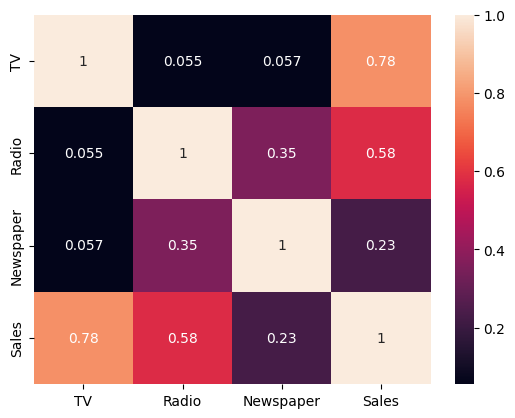

In [11]:
# Heatmap Plot of correlation
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [14]:
# Plotting for TV vs Sales
import plotly.express as px
px.scatter(df, x='TV', y='Sales', width=850, height=500, title='TV vs Sales')


In [15]:
# Plotting for Radio vs Sales
px.scatter(df, x='Radio', y='Sales', width=850, height=500, title='Radio vs Sales')


In [18]:
# Plotting for Newspaper vs Sales
px.scatter(df, x='Newspaper', y='Sales', width=850, height=500, title='Newspaper vs Sales')

# Process of Model Training

In [17]:
x = df.iloc[:, 0:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y = df.iloc[:, -1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Test And Train Data Split

In [20]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation and Prediction

In [22]:
y_pred = model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [24]:
model.intercept_

2.979067338122629

In [25]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [26]:
from sklearn import metrics

# Mean Absolute Error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_pred, y_test))

Mean Absolute Error:  1.4607567168117603


In [29]:
# Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Root Mean Squared Error: 1.78159966153345


In [30]:
# R-Squared
print('R-Squared: ', metrics.r2_score(y_pred, y_test))

R-Squared:  0.8791069137120033


# Prediction

In [31]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


# Sales Prediction through Visualization

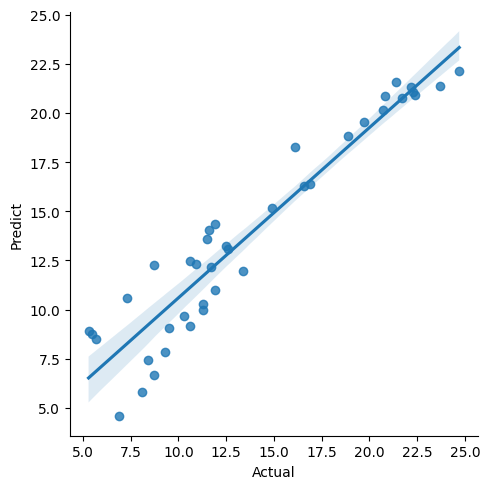

In [32]:
# Actual and Predicted Visualization
sns.lmplot(data = act_pred, x= 'Actual', y = "Predict")

import warnings
warnings.filterwarnings("ignore")

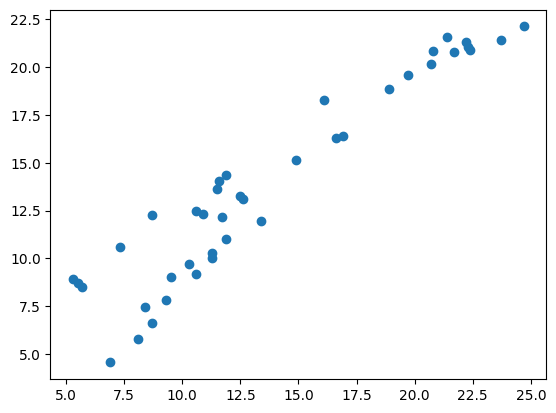

In [35]:
plt.scatter(y_test , y_pred)

---
**Conclusion:**
In this task, I conducted a thorough analysis of the Advertising Dataset, exploring correlations between different advertising channels and sales. Leveraging the Linear Regression algorithm, I developed a predictive model, enabling accurate sales forecasts based on ad expenditure. Validating the model's precision, I created a clear comparison between actual and predicted sales figures, providing valuable insights for strategic marketing decisions. This comprehensive approach not only enhances advertising strategies but also empowers businesses with reliable sales forecasting capabilities, fostering data-driven decision-making processes.




-----

**Thank You**

I would like to express my gratitude to OASIS INFOBYTE team for the opportunity to work on this project. Special thanks to the mentors and the team for their guidance and support throughout. This experience has been invaluable, enhancing my skills and understanding in the realm of data science and machine learning. I look forward to applying this knowledge in future endeavors. Thank you for the enriching learning experience.



----